In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from src.data_loader import read_data

train_data = read_data('train')
val_data = read_data('val')
test_data = read_data('test')

100%|██████████| 200/200 [00:00<00:00, 6076.94it/s]


In [3]:
from src.config import BATCH_SIZE
import random 
import numpy as np 
import torch 

from src.networks.CLIP_Basic import CLIP_only_dataset

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)
g = torch.Generator()
g.manual_seed(0)

def get_dataloader(data):
    dataset = CLIP_only_dataset(data)
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE,shuffle=True, worker_init_fn=seed_worker, generator=g)
    return data_loader
    
train_loader = get_dataloader(train_data)
val_loader = get_dataloader(val_data)
test_loader = get_dataloader(test_data)

100%|██████████| 2/2 [00:00<00:00,  2.87it/s]




For epoch = 0
Training Loss = 0.6973411440849304 | Training Accuracy = 0.0815340909090909
Validation Loss = 0.6854851245880127|Validation Accuracy = 0.06401209677419355




100%|██████████| 2/2 [00:00<00:00,  2.88it/s]




For epoch = 1
Training Loss = 0.691094084219499 | Training Accuracy = 0.12092803030303031
Validation Loss = 0.6856548488140106|Validation Accuracy = 0.07862903225806452




100%|██████████| 2/2 [00:00<00:00,  2.86it/s]




For epoch = 2
Training Loss = 0.689571266824549 | Training Accuracy = 0.12803030303030305
Validation Loss = 0.6894136369228363|Validation Accuracy = 0.07913306451612903




100%|██████████| 2/2 [00:00<00:00,  2.85it/s]




For epoch = 3
Training Loss = 0.6910162920301611 | Training Accuracy = 0.1184659090909091
Validation Loss = 0.6899259984493256|Validation Accuracy = 0.07913306451612903




100%|██████████| 2/2 [00:00<00:00,  2.83it/s]




For epoch = 4
Training Loss = 0.6896975609389219 | Training Accuracy = 0.1237689393939394
Validation Loss = 0.6897784173488617|Validation Accuracy = 0.07963709677419355




100%|██████████| 2/2 [00:00<00:00,  2.78it/s]




For epoch = 5
Training Loss = 0.6912453906102614 | Training Accuracy = 0.12840909090909092
Validation Loss = 0.6919819116592407|Validation Accuracy = 0.07963709677419355




100%|██████████| 2/2 [00:00<00:00,  2.74it/s]




For epoch = 6
Training Loss = 0.6921459842811931 | Training Accuracy = 0.12679924242424243
Validation Loss = 0.6935277879238129|Validation Accuracy = 0.07913306451612903




100%|██████████| 2/2 [00:00<00:00,  2.72it/s]




For epoch = 7
Training Loss = 0.6904057453979145 | Training Accuracy = 0.1278409090909091
Validation Loss = 0.6945162713527679|Validation Accuracy = 0.07963709677419355




100%|██████████| 2/2 [00:00<00:00,  2.67it/s]




For epoch = 8
Training Loss = 0.6923399296673861 | Training Accuracy = 0.11789772727272728
Validation Loss = 0.6949044167995453|Validation Accuracy = 0.06401209677419355




100%|██████████| 2/2 [00:00<00:00,  2.67it/s]




For epoch = 9
Training Loss = 0.6942931711673737 | Training Accuracy = 0.12111742424242423
Validation Loss = 0.6945338249206543|Validation Accuracy = 0.06401209677419355




100%|██████████| 2/2 [00:00<00:00,  2.66it/s]




For epoch = 10
Training Loss = 0.6948385590856726 | Training Accuracy = 0.11931818181818182
Validation Loss = 0.6952058970928192|Validation Accuracy = 0.06350806451612903




100%|██████████| 2/2 [00:00<00:00,  2.68it/s]




For epoch = 11
Training Loss = 0.6939575915986841 | Training Accuracy = 0.12537878787878787
Validation Loss = 0.6971117854118347|Validation Accuracy = 0.06300403225806452




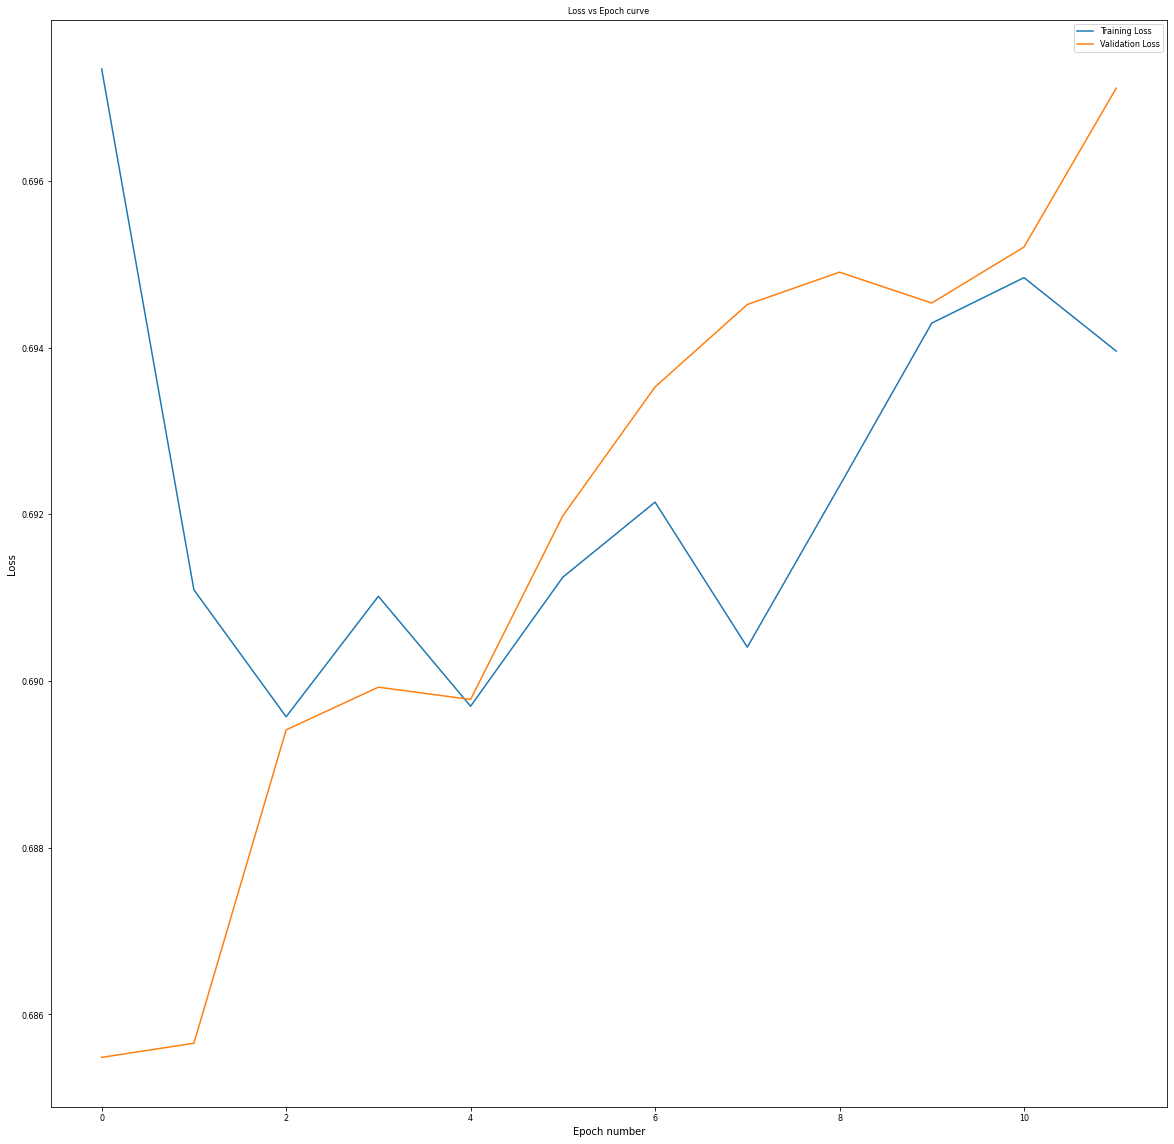

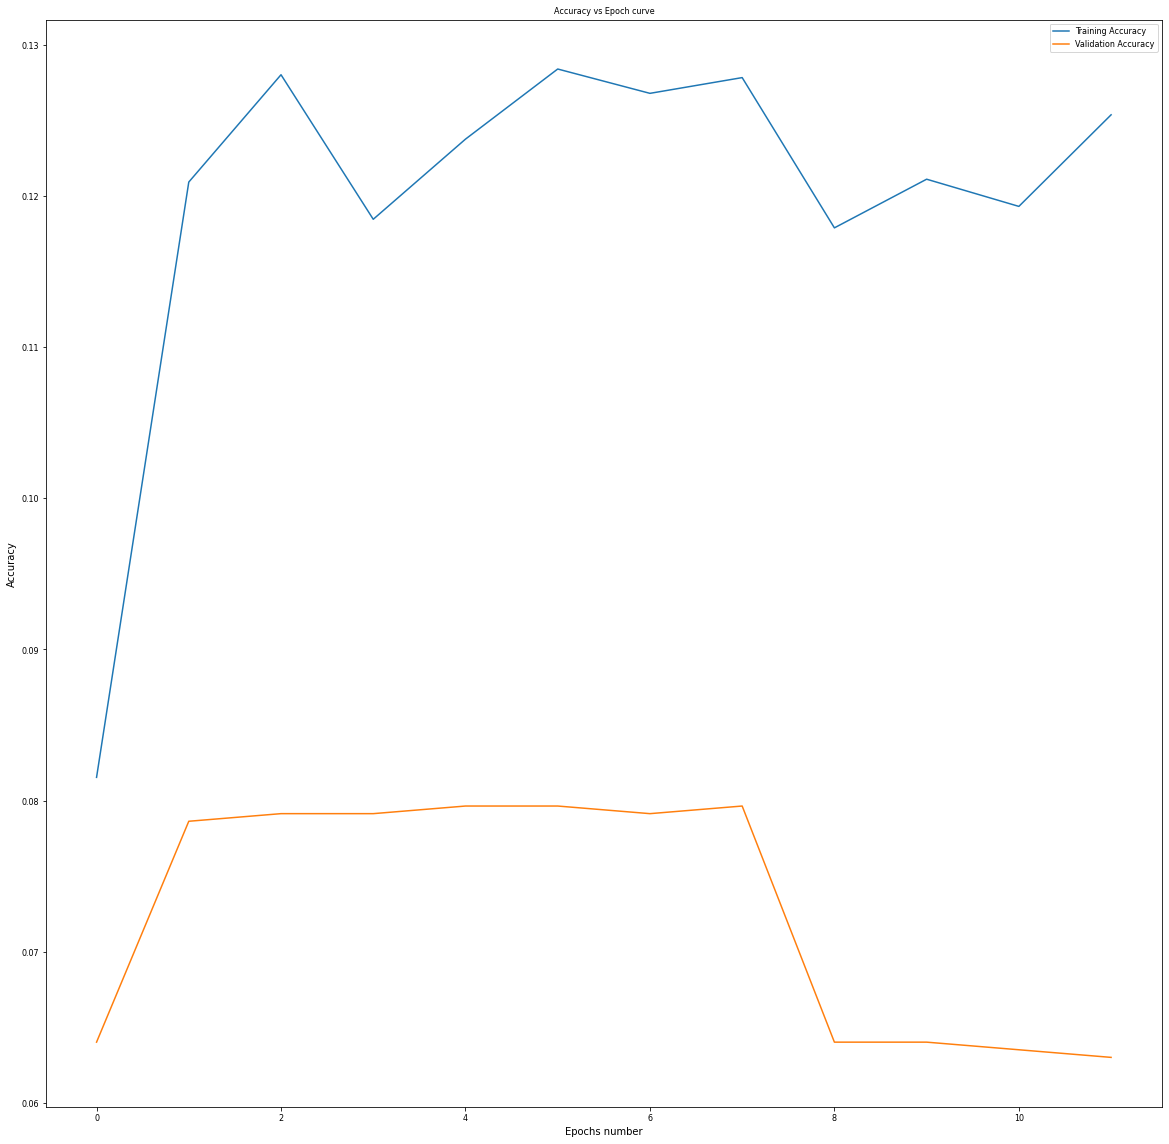

In [4]:
from src.trainer import Trainer
from src.networks.CLIP_Basic import CLIP_only_Model, CLIP_only_Input_transformer
import torch.nn as nn
import torch 

trainer = Trainer(12)

#Set data
trainer.set_data(train_loader, val_loader)

#set model 
model = CLIP_only_Model().cuda()
input_transformer = CLIP_only_Input_transformer()
trainer.set_model(model, input_transformer)

#Backpropagation
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
trainer.set_optimizer(optimizer, loss_fn)
trainer.train(l2_r=1e-3)
trainer.plot()

In [5]:
trainer.test(test_loader)

100%|██████████| 22/22 [00:08<00:00,  2.66it/s]

Accuracy Score = 12.954876273653564
Macro F1 score Score = 4.195111384511121
Micro F1 score Score = 32.577903682719544


In [6]:
torch.save(model.state_dict(), f"Models/CLIP_Basic.model")